<a href="https://colab.research.google.com/github/Maxwell619/AI-Coursework-2025/blob/master/Mall_Customers_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded_image = files.upload()

for filename in uploaded_image.keys():
  print(f'User uploaded file "{filename}"')

Saving Screenshot 2025-10-30 213906.png to Screenshot 2025-10-30 213906 (1).png
Saving Screenshot 2025-10-30 215240.png to Screenshot 2025-10-30 215240.png
User uploaded file "Screenshot 2025-10-30 213906 (1).png"
User uploaded file "Screenshot 2025-10-30 215240.png"


In [ ]:
!pip install Pillow

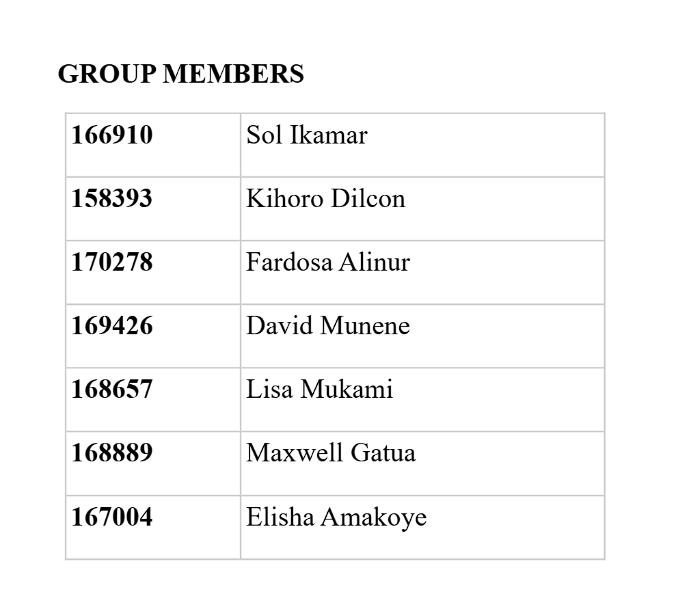

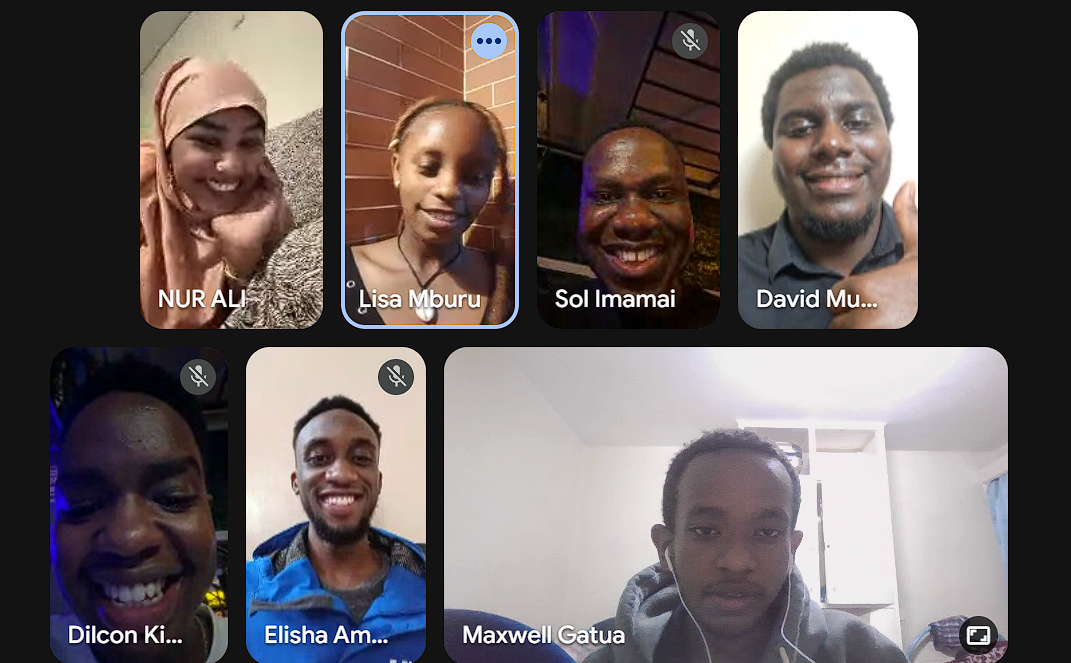

In [ ]:
from PIL import Image
filename = list(uploaded_image.keys())[1]

img = Image.open(filename)
display(img)

filename = list(uploaded_image.keys())[0]

img = Image.open(filename)
display(img)



1. Download and upload the Mall Customer Segmentation Dataset from Kaggle.

After uploading, the image file will be available in the Colab environment. You can then use libraries like Pillow (PIL) or OpenCV to open and process the image.

In [ ]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded=files.upload()
df=pd.read_csv("Mall_Customers.csv")



Saving Mall_Customers.csv to Mall_Customers.csv


2. After appropriately cleaning the data, carry out Exploratory Data Analysis
processes to retrieve at least 3 insights/observations from the dataset.

#Data Cleaning

Scrub for duplicates

In [ ]:
df.drop_duplicates
display(df.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


 Examine data types and missing values

.


In [ ]:
df.info()
print("\nMissing values per column:")
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Missing values per column:


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Exploratory data analysis

In [ ]:

display(df.describe())

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.650000,50.200000
std,57.879185,13.969007,26.300496,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


3. Use the k-means algorithm to create groups of customers based on:

a. 1 suitable feature.

b. 2 suitable features.

In both cases, verify the optimal number of clusters using both the elbow and
silhouette scores for verification.

#Grouping customers
a) Using annual income

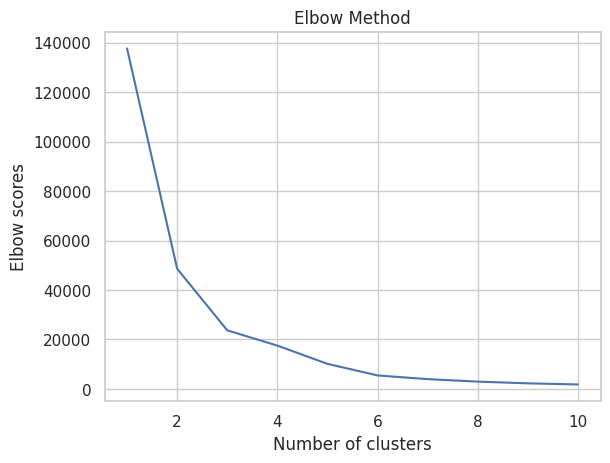

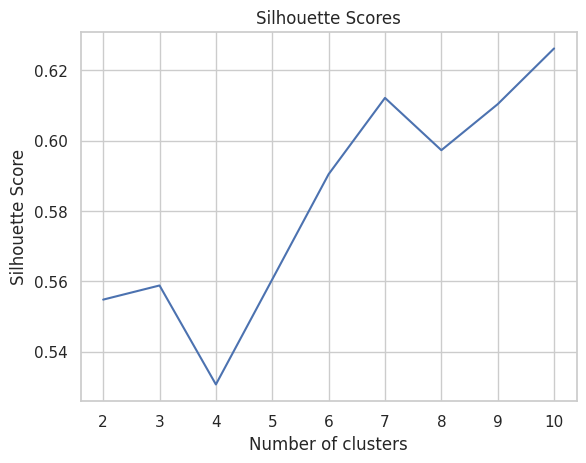

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns


Elbow_scores=[]
sil_scores=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, random_state=0).fit(df[['Annual Income (k$)']])
  Elbow_scores.append(kmeans.inertia_)
  if i>=2:
    sil_scores.append(silhouette_score(df[['Annual Income (k$)']], kmeans.labels_))
  else:
    sil_scores.append(np.nan)

plt.plot(range(1,11),  Elbow_scores)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Elbow scores")
plt.show()

plt.plot(range(2,11), sil_scores[1:])
plt.title("Silhouette Scores")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

Optimal no.of clusters is 4

b) Using annual income and spending score

In [ ]:

 Elbow_scores = []
 sil_scores = []
 for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=0).fit(df[['Annual Income (k$)','Spending Score (1-100)']])
  Elbow_scores.append(kmeans.inertia_)
  if i >= 2:
    sil_scores.append(silhouette_score(df[['Annual Income (k$)','Spending Score (1-100)']], kmeans.labels_))
  else:
    sil_scores.append(np.nan)


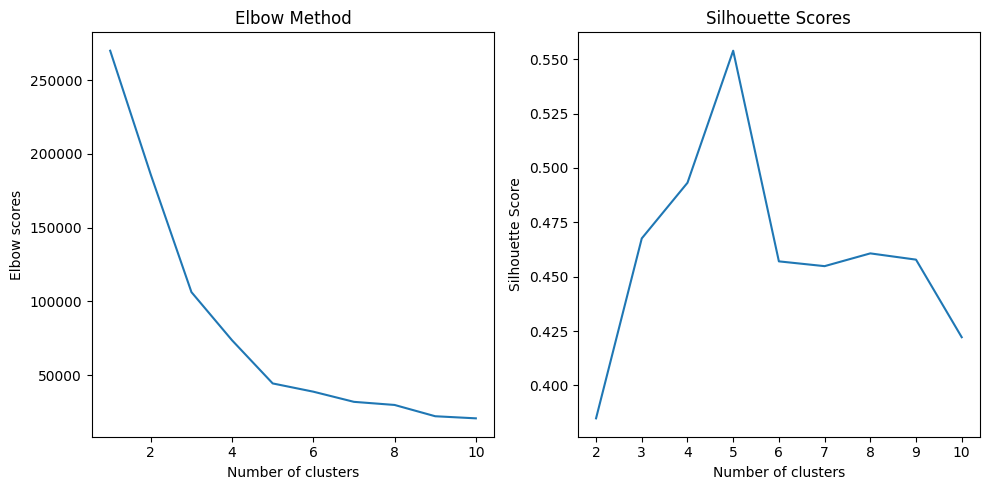

In [ ]:

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), Elbow_scores)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Elbow scores")


plt.subplot(1, 2, 2)
plt.plot(range(2, 11), sil_scores[1:])
plt.title("Silhouette Scores")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

Optimal no.of clusters is 5

4. Visualise and compare the clustering done in 3a and 3b by commenting on the
distribution of clusters


a) Clustering based on annual income.

---



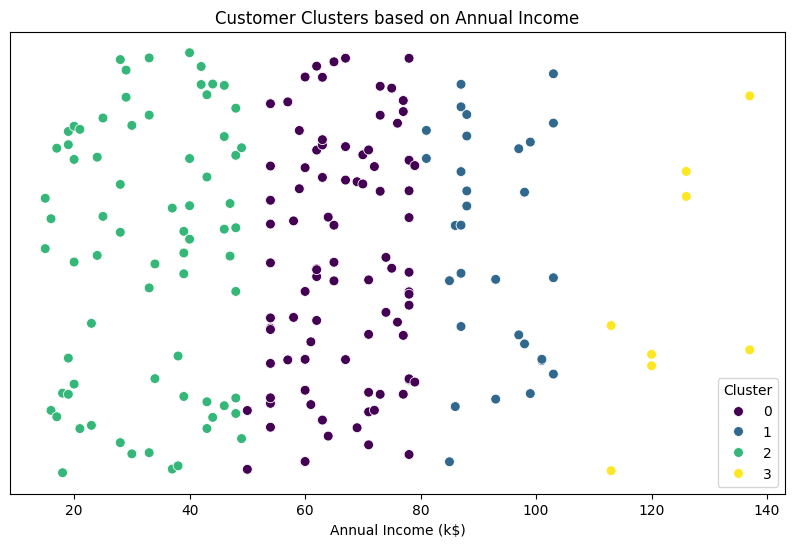

In [ ]:
import matplotlib.pyplot as plt

kmeans_income = KMeans(n_clusters=4, random_state=0, n_init='auto')
df['Income_Cluster'] = kmeans_income.fit_predict(df[['Annual Income (k$)']])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y=np.random.rand(len(df)) * 0.5, hue='Income_Cluster', data=df, palette='viridis', s=50)
plt.title('Customer Clusters based on Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('')
plt.yticks([])
plt.legend(title='Cluster')
plt.show()

b) Clustering based on annual income and spending scores

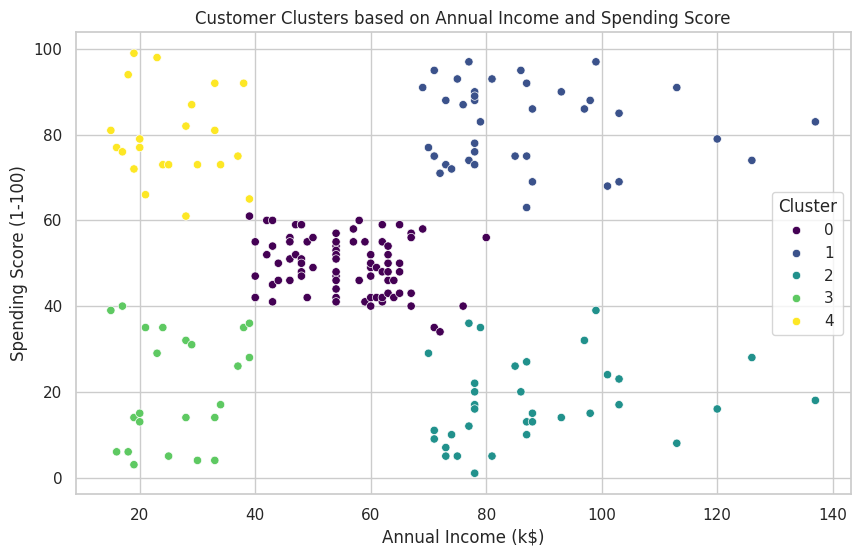

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Clusters based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

5. Using a case example of a mall segmenting customers for customer engagement,
use the clustering done in 3b to suggest appropriate ways by which mall
management can interact with their customers.





A mall say Quickmart, could stack more of moderately fairly priced products since the cluster consisting of customers earning 40-60k whose spending scores are also ranging from 40-60k, is highly populated thus moderately priced items will tend to sell fast. The mall could also advertise their high quality, expensive products more often to encourage more customers earning more than 80k to increase their spending score thus increasing the population of that cluster.